<img src="logoucm.png" style="height: 100px">
<center style="color:#888">Examen Análisis Multivariante<br/>Facultad de Matemáticas UCM</center>


## Análisis Multivariante
## Examen convocatoria ordinaria 9/1/2023

In [1]:
nombreyapellidos = "Pedro Luis Asensio Amat"
if nombreyapellidos == "":
    
    print("Rellena tu nombre completo!")
else:
    print("Gracias!: ", nombreyapellidos, ":)")

Gracias!:  Pedro Luis Asensio Amat :)


## Valoración.

Esta parte del examen se valorará con un máximo de 1,75 puntos.

Las preguntas que encontrarás en este notebook tienen la siguiente valoración:

| <i></i> | Tema | Puntos |  
| --- | --- |  --- |
| Pregunta 1 | Carga de datos |0,05 |
| Pregunta 2 | Indicadores | 0,10 |
| Pregunta 3 | Exploración gráfica | 0,10 |
| Pregunta 4 | KNN | 0,75 |
| Pregunta 5 | Árbol de decisión | 0,75 |
| <i></i> |  **Total**  | 1,75 |

También verás indicada la puntuación junto a cada pregunta.

Para la valoración, se tendrá en cuenta:

* Corrección, coherencia y simplicidad del código.
* Aplicación adecuada de la técnica de clasificación.
* Comentarios que expliquen los pasos que realizas.
* Conclusiones.

## Importando algunas de las librerías que podemos necesitar

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Antecedentes
Queremos entrenar un modelo que pueda predecir el riesgo de accidente de un conductor en función de 3 características:
* Velocidad máxima (en Km/h)
* Edad (en años)
* Kilómetros por año (en miles)
Disponemos de una variable etiqueta denominada ```Riesgo``` donde se ha clasificado al conductor de acuerdo al número de accidentes en que se ha visto involucrado en el pasado:
* 2 - rojo: muchos accidentes
* 0 - verde: muy pocos o sin accidentes
* 1 - amarillo: en el medio

## Cargando los datos

En el fichero adjunto "asegurados.csv" disponéis de los datos antes mencionados. La información por columnas es la siguiente:
* Codigo. Codigo de cliente.
* Velocidad. Velocidad máxima en kilómetros por hora.
* Edad. Edad del conductor asegurado.
* Km. Kilómetros por año en miles.
* Riesgo: nivel de riesgo del conductor siendo:
  * 2: muchos accidentes.
  * 0: muy pocos o sin accidentes.
  * 1: en el medio.

### Pregunta 1 (0,05 puntos)

Carga el archivo de datos ```asegurados.csv``` en un dataframe de pandas.

Comprueba si hay algún dato ausente con la operación adecuada. En caso de haberlos, impútalos usando la media.

In [3]:
df= pd.read_csv('asegurados.csv', sep=';')
df.head()

,codigo,Velocidad,edad,km,Riesgo
0,90001,157.7,44.0,40.2,0
1,90002,189.9,54.0,38.6,0
2,90003,178.6,26.0,54.7,2
3,90004,156.1,25.0,16.1,1
4,90005,183.5,38.0,35.4,0


Elimino la primera columna, pues no resulta de nuestro interés

In [4]:
df=df.drop(columns=['codigo'])

In [5]:
df.head()

,Velocidad,edad,km,Riesgo
0,157.7,44.0,40.2,0
1,189.9,54.0,38.6,0
2,178.6,26.0,54.7,2
3,156.1,25.0,16.1,1
4,183.5,38.0,35.4,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Velocidad  1500 non-null   float64
 1   edad       1500 non-null   float64
 2   km         1500 non-null   float64
 3   Riesgo     1500 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 47.0 KB


Apreciamos que no hay datos faltantes, por lo que continuamos con nuestro trabajo

### Pregunta 2 (0,10 puntos)

Calcula los indicadores estadísticos que consideres sobre las variables del dataset. Comenta brevemente los resultados más significativos.


In [7]:
df.describe()

,Velocidad,edad,km,Riesgo
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,197.133200,44.980667,48.978600,1.000667
std,28.331327,17.130400,24.546236,0.817177
min,109.400000,16.000000,1.600000,0.000000
25%,173.800000,32.000000,29.000000,0.000000
50%,193.100000,42.000000,46.700000,1.000000
75%,220.500000,55.000000,67.600000,2.000000
max,267.200000,100.000000,135.200000,2.000000


Mediante la función .describe() Python nos proporciona una serie de estadísticos como la media, la desviación típica o mínimos y máximos. Apreciamos que la velocidad media es realmente alta, caso normal teniendo en cuenta que tienen relación con los accidentes. 


### Pregunta 3 (0,10 puntos)

Realiza una exploración visual, se recomienda realizar los diagramas de cajas (boxplot), histogramas y gráficos de dispersión 2 a 2 para las variables del dataframe.

Analiza la correlación entre las variables.

Comenta brevemente los resultados más significativos.

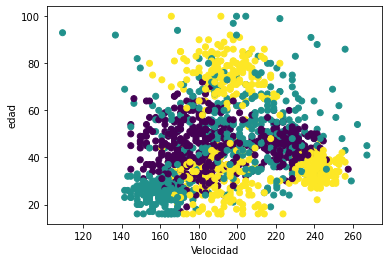

In [8]:
plt.scatter(df['Velocidad'],df['edad'],c=df['Riesgo']) 
plt.xlabel('Velocidad');
plt.ylabel('edad');

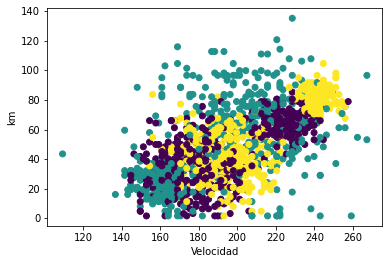

In [9]:
plt.scatter(df['Velocidad'],df['km'],c=df['Riesgo'])
plt.xlabel('Velocidad');
plt.ylabel('km');

No apreciamos especial agrupación entre la velocidad y la edad. Asimismo, tampoco se aprecian grupos claramente diferenciados entre kilómetros y velocidad

<AxesSubplot:xlabel='Riesgo', ylabel='Count'>

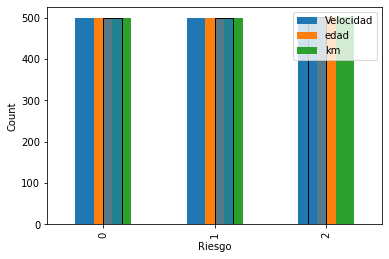

In [10]:
df.groupby('Riesgo').count().plot.bar()
import seaborn as sns
sns.histplot(data=df,x='Riesgo')

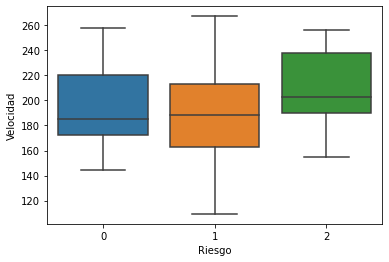

In [11]:
sns.boxplot(x=df['Riesgo'],y=df['Velocidad'])
plt.show()

Se puede apreciar que, a mayor velocidad, mayor riesgo, aunque estas diferencias no son especialmetne significativas. No se presentan outliers

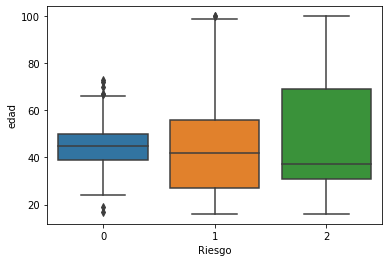

In [12]:
sns.boxplot(x=df['Riesgo'],y=df['edad'])
plt.show()

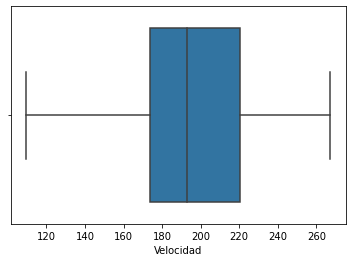

In [34]:
sns.boxplot(x=df['Velocidad'])
plt.show()

Sorprendentemente podemos apreciar que no hay outliers en la velocidad. Esto se puede deber a que, a pesar de que para nosotros un valor de más de 260 km/h es alto, para el sistema no, apreciando así la importancia que tiene un análisis humano del proceso

Apreciamos ciertos outliers entre aquellos conductores que no se han visto involucrados en ningún accidente en el pasado, pues existen tanto individuos con muy baja edad como gente especialmente mayor

,Velocidad,edad,km,Riesgo
Velocidad,1.000000,0.062840,0.603648,0.233186
edad,0.062840,1.000000,-0.017023,0.044940
km,0.603648,-0.017023,1.000000,0.167721
Riesgo,0.233186,0.044940,0.167721,1.000000


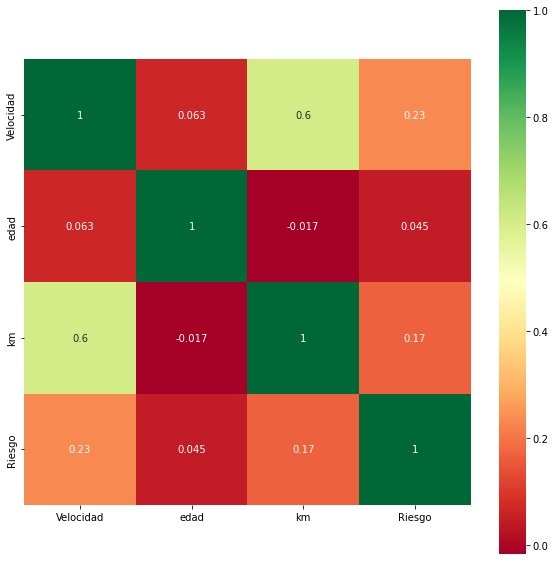

In [13]:
plt.figure(figsize=(10,10))
correlaciones= df.corr()


sns.heatmap(correlaciones,cmap="RdYlGn",annot=True, square=True)
correlaciones

No apreciamos correlaciones especialmente sifnificativas entre las distintas variables. Tal vez podamos apreciar que los conductores que más kilómetros recorren al año tienden a ir a una velocidad mayor, conllevando así un mayor riesgo, aunque de forma muy poco significativa

### Pregunta 4 (0,75 puntos)

Utiliza un modelo **knn (K-nearest neighbor <k-vecinos más próximos>)** para predecir la columna ```Riesgo``` en función de ```Velocidad```, ```edad``` y , ```km```.

* Explica tu elección de parámetros.
* Realiza una validación sobre los resultados utilizando el procedimiento y la métrica que prefieras. Justifica la respuesta.
* Muestra la matriz de confusión. Comenta los resultados.
* Valora como clasifica tu modelo a un conductor con los siguientes datos: 
    * Velocidad 160.0	edad 20.0	km 25.0

In [17]:
from sklearn.neighbors import KNeighborsClassifier


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

X_train.shape, X_test.shape

((750, 3), (750, 3))

In [23]:
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# En lugar de definir la accuracy como antes, podemos utilizar directamente la métrica desde sklearn
from sklearn import metrics

acc = metrics.accuracy_score(y_test, y_pred) #Esta métrica coincide con el de antes importado desde el paquete que hemos invocado
print('Accuracy: ', acc)

Accuracy:  0.7066666666666667


In [24]:
ks = list(range(1, 16)) #Generamos una lista con valores de 1 a 15
print(ks)

# En este diccionario iremos guardando las accuracies sobre test asociadas a cada valor de $k$
accs = {}

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [25]:
# Vamos recorriendo la rejilla con un bucle for...
for k in ks:
    
    # Definimos el modelo con el valor de hiperparámetro correspondiente
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Ajustamos a los datos de entrenamiento
    knn.fit(X_train, y_train)
    
    # Hacemos predicciones sobre los datos de test
    y_pred = knn.predict(X_test)
    
    # Evaluamos y guardamos la métrica correspondiente (en este caso accuracy)
    acc = metrics.accuracy_score(y_test, y_pred)
    accs[k] = acc

In [26]:
accs

{1: 0.7066666666666667,
 2: 0.728,
 3: 0.7546666666666667,
 4: 0.7666666666666667,
 5: 0.776,
 6: 0.78,
 7: 0.7733333333333333,
 8: 0.7746666666666666,
 9: 0.784,
 10: 0.7906666666666666,
 11: 0.7786666666666666,
 12: 0.7813333333333333,
 13: 0.7813333333333333,
 14: 0.7786666666666666,
 15: 0.776}

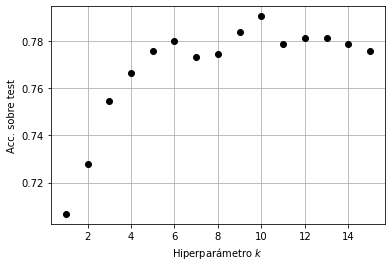

In [27]:
ks_arr = np.fromiter(accs.keys(), dtype=int)
accs_arr = np.fromiter(accs.values(), dtype=float)

plt.plot(ks_arr, accs_arr, 'ok')
plt.grid(True)
plt.xlabel('Hiperparámetro $k$');
plt.ylabel('Acc. sobre test');

Nos quedaremos con el kNN que utilice 10 parámetros

In [29]:
from sklearn.metrics import confusion_matrix

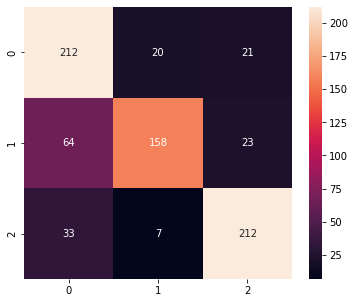

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.show()

Apreciamos que nuestor modelo no predice del todo correctamente, sobre todo cuando se trata de predecir cuando el riesgo es 1.

### Pregunta 5 (0,75 puntos)

Ajusta un modelo de **árbol de decisión** para predecir la columna ```Riesgo``` en función de ```Velocidad```, ```edad```, ```km```. 

con profundidad máxima de 3 niveles y utilizando el método de cross-validation con 5 bloques. Responde a las siguientes cuestiones:
* Evalúa el resultado del modelo. Utiliza la métrica que prefieras. Justifica la respuesta.
* Pinta el árbol del modelo e indica la hoja (nodo final) con mejor resultado. Justifica tu respuesta.
* Valora como clasifica tu modelo a un conductor con los siguientes datos: 
    * Velocidad 160.0	edad 20.0	km 25.0

[Text(0.5, 0.875, 'X[0] <= 235.8\ngini = 0.667\nsamples = 1500\nvalue = [500, 499, 501]'),
 Text(0.25, 0.625, 'X[1] <= 66.5\ngini = 0.661\nsamples = 1315\nvalue = [483, 474, 358]'),
 Text(0.125, 0.375, 'X[1] <= 30.5\ngini = 0.636\nsamples = 1112\nvalue = [478, 420, 214]'),
 Text(0.0625, 0.125, 'gini = 0.538\nsamples = 284\nvalue = [23, 167, 94]'),
 Text(0.1875, 0.125, 'gini = 0.584\nsamples = 828\nvalue = [455, 253, 120]'),
 Text(0.375, 0.375, 'X[2] <= 57.1\ngini = 0.425\nsamples = 203\nvalue = [5, 54, 144]'),
 Text(0.3125, 0.125, 'gini = 0.276\nsamples = 168\nvalue = [4, 23, 141]'),
 Text(0.4375, 0.125, 'gini = 0.207\nsamples = 35\nvalue = [1, 31, 3]'),
 Text(0.75, 0.625, 'X[1] <= 42.5\ngini = 0.376\nsamples = 185\nvalue = [17, 25, 143]'),
 Text(0.625, 0.375, 'X[2] <= 62.8\ngini = 0.138\nsamples = 151\nvalue = [4, 7, 140]'),
 Text(0.5625, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [1, 5, 0]'),
 Text(0.6875, 0.125, 'gini = 0.067\nsamples = 145\nvalue = [3, 2, 140]'),
 Text(0.875, 0.375

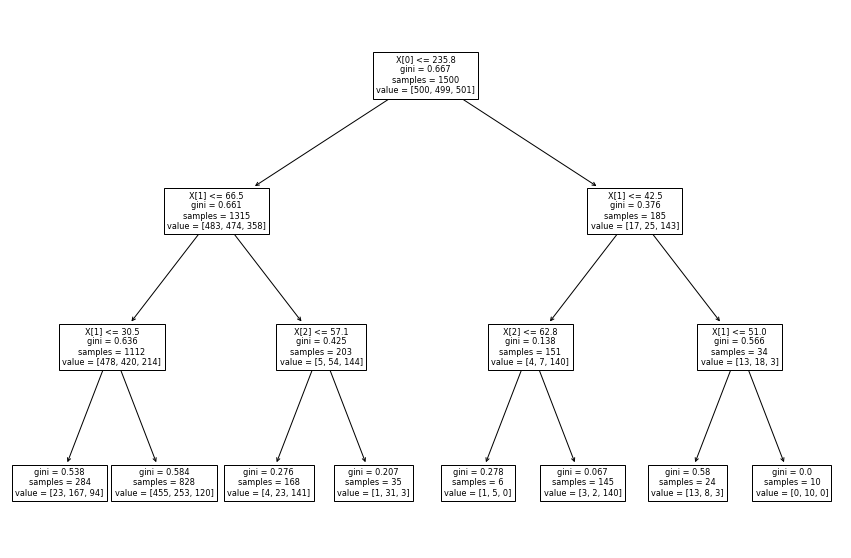

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
arbol= DecisionTreeClassifier(max_depth=3)
X=df[['Velocidad','edad','km']]
y=df['Riesgo']

arbol.fit(X, y)

from sklearn import tree

plt.figure(figsize=(15, 10))
tree.plot_tree(arbol)

El mejor resultado es el de tener una velocidad menor a 235,8; una edad inferior a 66 años y medio y un kilometraje superior a 30,5 kms. Esto es así porque la impureza de Gini tiene valor máximo en esta hoja del árbol. 

Para un conductor con las siguientes características podemos apreciar que la hoja final es la que se encuentra al final del todo. Tiene una impureza de Gini de 0,53 y los resultados son que, en la mayoría de los casos (en 167 de 284) podemos encontrar con un riesgo moderado en accidentes. Por lo general, este tipo de conductores no tienen un riesgo bajo de accidentes, (23 de 284)